In [105]:
import h5py 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
from scipy.interpolate import interp1d
from scipy.spatial.distance import pdist as pair_distance
import mplhep as hep
hep.style.use('ATLAS')

In [2]:
import numpy as np
from scipy.interpolate import interp1d, splrep, splint
from scipy.integrate import quad

HBARC = 0.19732

gaulep48 = np.array([
    0.998771007252426118601,	0.993530172266350757548,
    0.984124583722826857745,	0.970591592546247250461,
    0.952987703160430860723,	0.931386690706554333114,
    0.905879136715569672822,	0.876572020274247885906,
    0.843588261624393530711,	0.807066204029442627083,
    0.767159032515740339254,	0.724034130923814654674,
    0.677872379632663905212,	0.628867396776513623995,
    0.577224726083972703818,	0.523160974722233033678,
    0.466902904750958404545,	0.408686481990716729916,
    0.348755886292160738160,	0.287362487355455576736,
    0.224763790394689061225,	0.161222356068891718056,
    0.097004699209462698930,	0.032380170962869362033 ])

gaulew48 = np.array([
    0.003153346052305838633,	0.007327553901276262102,
    0.011477234579234539490,	0.015579315722943848728,
    0.019616160457355527814,	0.023570760839324379141,
    0.027426509708356948200,	0.031167227832798088902,
    0.034777222564770438893,	0.038241351065830706317,
    0.041545082943464749214,	0.044674560856694280419,
    0.047616658492490474826,	0.050359035553854474958,
    0.052890189485193667096,	0.055199503699984162868,
    0.057277292100403215705,	0.059114839698395635746,
    0.060704439165893880053,	0.062039423159892663904,
    0.063114192286254025657,	0.063924238584648186624,
    0.064466164435950082207,	0.064737696812683922503 ])

gala15x = np.array([	0.093307812017,         0.492691740302,
    1.215595412071,         2.269949526204,
    3.667622721751,         5.425336627414,
    7.565916226613,        10.120228568019, 
    13.130282482176,        16.654407708330,
    20.776478899449,        25.623894226729,
    31.407519169754,        38.530683306486,
    48.026085572686	])

gala15w = np.array([	0.239578170311,         0.560100842793,
    0.887008262919,         1.22366440215,
    1.57444872163,          1.94475197653,
    2.34150205664,          2.77404192683,
    3.25564334640,          3.80631171423,
    4.45847775384,          5.27001778443,
    6.35956346973,          8.03178763212,
    11.5277721009   ])

NY = 41
NPT = 15
NPHI = 48
INVP = 1/12.0

# used as rapidity or pseudo-rapidity
Y = np.linspace( -8, 8, NY, endpoint=True )

# used as transverse momentum 
PT = INVP * gala15x

# used as azimuthal angle
PHI = np.zeros( NPHI )
PHI[0:NPHI//2] = np.pi*(1.0-gaulep48)
PHI[NPHI-1:NPHI//2-1:-1] = np.pi*(1.0+gaulep48)

print("Y=", Y)

print("Pt=", PT)

print("Phi=", PHI)

def pt_integral(spec_along_pt):
    '''1D integration along transverse momentum'''
    return (spec_along_pt*gala15w*INVP).sum()

def phi_integral(spec_along_phi):
    '''1D integration along azimuthal angle'''
    return np.pi*((spec_along_phi[0:NPHI//2] + 
        spec_along_phi[NPHI-1:NPHI//2-1:-1])*gaulew48).sum()

def rapidity_integral(spec_along_y, ylo=-0.5, yhi=0.5):
    '''1D integration along rapidity/pseudo-rapidity 
    The spline interpolation and integration is much faster than
    the interp1d() and quad combination'''
    #f = interp1d(Y, spec_along_y, kind='cubic')
    #return quad(f, ylo, yhi, epsrel=1.0E-5)[0]
    tck = splrep(Y, spec_along_y)
    return splint(ylo, yhi, tck)

Y= [-8.  -7.6 -7.2 -6.8 -6.4 -6.  -5.6 -5.2 -4.8 -4.4 -4.  -3.6 -3.2 -2.8
 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2.   2.4  2.8
  3.2  3.6  4.   4.4  4.8  5.2  5.6  6.   6.4  6.8  7.2  7.6  8. ]
Pt= [0.00777565 0.04105765 0.10129962 0.18916246 0.30563523 0.45211139
 0.63049302 0.84335238 1.09419021 1.38786731 1.73137324 2.13532452
 2.61729326 3.21089028 4.0021738 ]
Phi= [3.86099459e-03 2.03255633e-02 4.98740911e-02 9.23892368e-02
 1.47693486e-01 2.15555068e-01 2.95689413e-01 3.87760434e-01
 4.91381968e-01 6.06119396e-01 7.31491473e-01 8.66972347e-01
 1.01199377e+00 1.16594746e+00 1.32818769e+00 1.49803398e+00
 1.67477392e+00 1.85766620e+00 2.04594372e+00 2.23881677e+00
 2.43547638e+00 2.63509768e+00 2.83684340e+00 3.03986735e+00
 3.24331796e+00 3.44634190e+00 3.64808762e+00 3.84770893e+00
 4.04436853e+00 4.23724158e+00 4.42551910e+00 4.60841139e+00
 4.78515133e+00 4.95499761e+00 5.11723785e+00 5.27119154e+00
 5.41621296e+00 5.55169383e+00 5.67706591e+00 5.79180334e+00


In [3]:
pt=PT

In [4]:
def read_data(fname="G:o16_clvisc_data/OO_WS_1000/OO200/0_5/event%d/dNdEtaPtdPtdPhi_211.dat",n_event=1000):
    o16_ws = []
    for i in range(n_event):
        o16_ws.append(np.loadtxt(fname%i))
    o16_ws = np.reshape(o16_ws,(n_event,41,15,48))
    o16_ws_mideta = o16_ws[:,20,:,:]
    return o16_ws_mideta

In [5]:
# o16_ws_mideta = read_data(fname="G:o16_clvisc_data/OO_WS_1000/OO200/0_5/event%d/dNdEtaPtdPtdPhi_211.dat")
o16_alpha_mideta = read_data(fname='/home/mengzhu/OO_work/OO200_eta_ofs_008_alpha/OO200/0_5/event%d/dNdEtaPtdPtdPhi_211.dat',n_event=2000)
o16_ws_mideta = read_data(fname='/home/mengzhu/OO_work/OO200_eta_ofs_008_alpha/OO200/0_5/event%d/dNdEtaPtdPtdPhi_211.dat',n_event=2000)

In [6]:
# o16_alpha_mideta = read_data(fname="G:o16_clvisc_data/OO_alpha_sam_dndeta/OO200/0_5/event%d/dNdEtaPtdPtdPhi_211.dat",n_event=2000)
# o16_alpha_mideta = read_data(fname="G:o16_clvisc_data/OO_ws_ideal/event%d/dNdEtaPtdPtdPhi_211.dat",n_event=800)

In [7]:
o16_ws_mideta.shape

(2000, 15, 48)

In [8]:
# 计算211产额
dndpt = []
for i in range(15):
    dndpt.append(phi_integral(o16_ws_mideta[9][i,:]))
dndpt = np.array(dndpt)

In [9]:
pt_integral(dndpt*pt)/HBARC**3

7.5727441405924445

## 计算dN/dpt

In [10]:
# def read_data_2(fname="G:o16_clvisc_data/OO_WS_1000/OO200/0_5/event%d/dNdEtaPtdPtdPhi_211.dat",n_event=1000):
#     o16_ws = []
#     for i in range(n_event):
#         o16_ws.append(np.loadtxt(fname%i))
#     o16_ws = np.reshape(o16_ws,(n_event,41,15,48))
#     return o16_ws


# o16_ws_mideta_all = read_data_2(fname="G:o16_clvisc_data/OO_ws_smooth/event%d/dNdEtaPtdPtdPhi_211.dat")

In [11]:
# def cal_dNptdpt(o16_ws_mideta_0):
#     '''o16_ws_mideta_0:中心快度区的二维数组
#     '''
#     dNptdpt = []
#     for i in range(len(o16_ws_mideta_0[0])):
#         aaa = rapidity_integral(o16_ws_mideta_0[:,i])
#         dNptdptdphi.append(aaa)
#     for j in range(len(aaa[0][0])):
#         bbb = phi_integral(aaa[:,:,])
#     return dNptdpt

In [12]:
# def cal_dNdYptdpt(o16_ws_mideta_0):
#     '''o16_ws_mideta_0:中心快度区的二维数组
#     '''
#     dNdYptdpt = []
#     for k in range(len(o16_ws_mideta_0)):
#         aaa = []
#         for i in range(41):
#             bbb = []
#             for j in range(15):
#                 bbb.append(phi_integral(o16_ws_mideta_0[k,i,j,:]))
#             aaa.append(bbb)
#         dNdYptdpt.append(aaa)
#     return np.array(dNdYptdpt)

In [13]:
# ws_dNdYdpt = cal_dNdYptdpt(o16_ws_mideta_all)
# ws_dNdYdpt.shape

In [14]:
# def cal_dNptdpt(o16_ws_mideta_0):
#     '''o16_ws_mideta_0:中心快度区的二维数组
#     '''
#     dNptdpt = []
#     for k in range(len(o16_ws_mideta_0)):
#         aaa = []
#         for i in range(15):
#             aaa.append(rapidity_integral(o16_ws_mideta_0[k,:,i]))
#         dNptdpt.append(aaa)
#     return np.array(dNptdpt)

In [15]:
# ws_dNdpt = cal_dNptdpt(ws_dNdYdpt)*pt
# ws_dNdpt.shape

In [16]:
# plt.scatter(pt,np.mean(ws_dNdpt,axis=0)/np.sum(np.mean(ws_dNdpt,axis=0)))
# plt.xlabel("pt")
# plt.ylabel(r"dN/dpt")

In [17]:
# np.mean(ws_dNdpt,axis=0)/np.sum(np.mean(ws_dNdpt,axis=0))

## 计算中心快度区的dN/dphi

In [18]:
def cal_dNdphi(o16_ws_mideta_0):
    '''o16_ws_mideta_0:一个事件
    '''
    dNdphi = []
    for i in range(len(o16_ws_mideta_0[0])):
        dNdphi.append(pt_integral(o16_ws_mideta_0[:,i]*pt))
    return dNdphi

In [19]:
def cal_dNdphi_2(o16_ws_mideta):
    '''o16_ws_mideta:中心快度区的二维数组
    '''
    ws_dNdphi = []
    for i in range(len(o16_ws_mideta)):
        ws_dNdphi.append(cal_dNdphi(o16_ws_mideta[i]))
    return np.array(ws_dNdphi)

In [20]:
ws_dNdphi_0 = cal_dNdphi_2(o16_ws_mideta)
alpha_dNdphi_0 = cal_dNdphi_2(o16_alpha_mideta)

In [21]:
ws_dNdphi_0.shape

(2000, 48)

## 将phi转化成等间距

In [22]:
#求出PHI的间隔
PHI_0 = []
PHI_0.append(0)
for i in range(len(PHI)):
    PHI_0.append(PHI[i])
PHI_0 = np.array(PHI_0)
# PHI_0

In [23]:
D_PHI = PHI_0[1:]-PHI_0[:-1]
D_PHI

array([0.00386099, 0.01646457, 0.02954853, 0.04251515, 0.05530425,
       0.06786158, 0.08013434, 0.09207102, 0.10362153, 0.11473743,
       0.12537208, 0.13548087, 0.14502142, 0.15395369, 0.16224023,
       0.16984628, 0.17673994, 0.18289229, 0.18827752, 0.19287305,
       0.19665961, 0.1996213 , 0.20174572, 0.20302394, 0.20345061,
       0.20302394, 0.20174572, 0.1996213 , 0.19665961, 0.19287305,
       0.18827752, 0.18289229, 0.17673994, 0.16984628, 0.16224023,
       0.15395369, 0.14502142, 0.13548087, 0.12537208, 0.11473743,
       0.10362153, 0.09207102, 0.08013434, 0.06786158, 0.05530425,
       0.04251515, 0.02954853, 0.01646457])

In [24]:
#拟合出cdf
def cal_cdf(even1):
    dN_cdf = []
    N_cdf = 0
    for i in range(len(even1)):
        N_cdf+=even1[i]*D_PHI[i]
        dN_cdf.append(N_cdf)
    return dN_cdf

def cal_cdf_2(ws_dNdphi_0):
    ws_cdf = []
    for i in range(len(ws_dNdphi_0)):
        ws_cdf.append(cal_cdf(ws_dNdphi_0[i]))
    return np.array(ws_cdf)

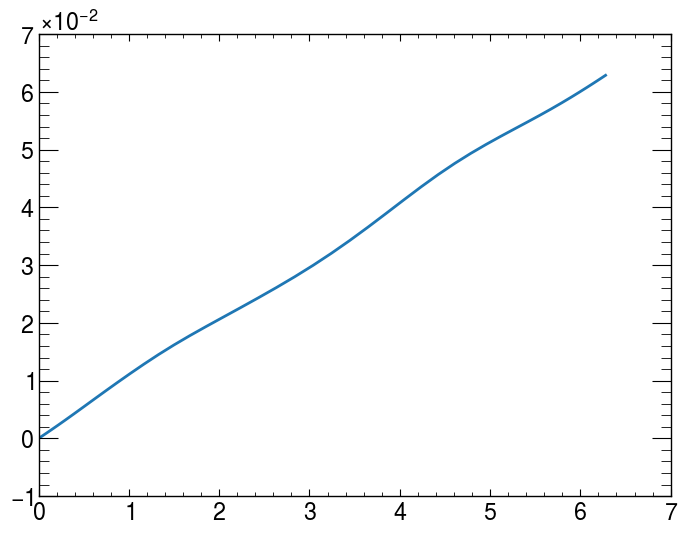

In [25]:
cdf1 = cal_cdf(alpha_dNdphi_0[np.random.randint(0,len(alpha_dNdphi_0))])
plt.plot(PHI,cdf1)

In [26]:
ws_cdf = cal_cdf_2(ws_dNdphi_0)
alpha_cdf = cal_cdf_2(alpha_dNdphi_0)

In [27]:
#重新均分phi
n_split = 48
new_phi = np.arange(1,n_split+1)*(PHI[-1]/n_split)

def new_dNdphi(ws_cdf_0):
    fff = interp1d(PHI,ws_cdf_0)
    new_ws_dNdphi = []
    for i in range(len(new_phi)):
        if i>0:
            new_ws_dNdphi.append(fff(new_phi[i])-fff(new_phi[i-1]))
        else:
            new_ws_dNdphi.append(fff(new_phi[i]))
    return np.array(new_ws_dNdphi)/(PHI[-1]/n_split)

def new_dNdphi_2(ws_cdf):
    dNdphi = []
    for i in range(len(ws_cdf)):
        dNdphi.append(new_dNdphi(ws_cdf[i]))
    return np.array(dNdphi)

In [28]:
ws_dNdphi_new = new_dNdphi_2(ws_cdf)
alpha_dNdphi_new = new_dNdphi_2(alpha_cdf)
ws_dNdphi_new.shape

(2000, 48)

In [29]:
kk = np.random.randint(0,1000)
print("修改前的N:%f"%phi_integral(ws_dNdphi_0[kk]) )  #修改前的
print("平均划分phi后的N:%f"%np.sum(ws_dNdphi_new[kk]*(PHI[-1]/n_split)))

修改前的N:0.053036
平均划分phi后的N:0.053073


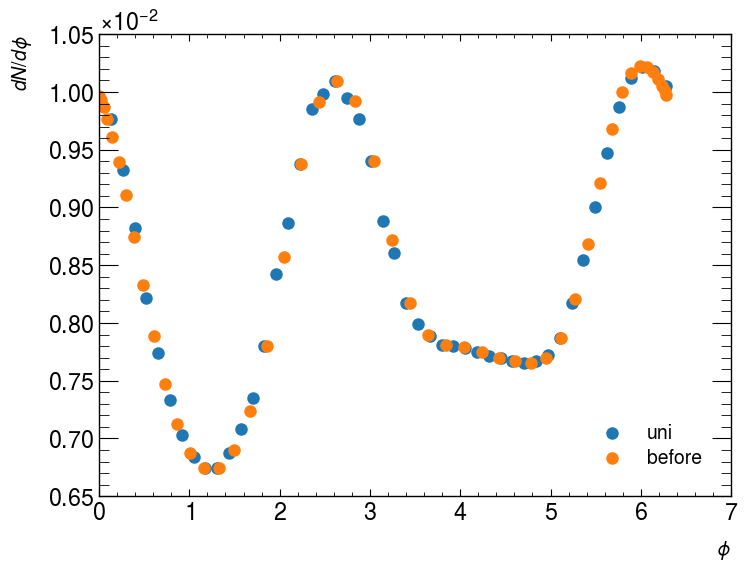

In [30]:
plt.scatter(new_phi,ws_dNdphi_new[kk],label="uni")
plt.scatter(PHI,ws_dNdphi_0[kk],label="before")
plt.xlabel(r"$\phi$")
plt.ylabel(r"$dN/d\phi$")
plt.legend()

In [31]:
# def cal_dNdphi_phi(PHI,ws_dNdphi):
#     '''先拟合每个事件的dNdphi关于phi的函数，然后输入等间距phi，最后输出dNdphi
#     '''
#     dNdphi_phi = []
#     phi_new = np.linspace(PHI[0],PHI[-1],100)
#     for i in range(len(ws_dNdphi)):
#         fff = interp1d(PHI,ws_dNdphi[i])
#         dNdphi_phi.append(fff(phi_new))
#     return np.array(dNdphi_phi)

In [32]:
# ws_dNdphi = cal_dNdphi_phi(PHI,ws_dNdphi_0)
# alpha_dNdphi = cal_dNdphi_phi(PHI,alpha_dNdphi_0)

In [33]:
# x = np.linspace(0,6.28,100)
# nnn = np.random.randint(0,2000)
# plt.plot(x,ws_dNdphi[nnn])
# plt.plot(PHI,ws_dNdphi_0[nnn],label="before")
# plt.legend()

## 计算关联函数C(Δphi)

In [34]:
ws_dNdphi = ws_dNdphi_new
alpha_dNdphi = alpha_dNdphi_new

# ws_dNdphi = ws_dNdphi_0
# alpha_dNdphi = alpha_dNdphi_0

In [35]:
# ws_dNdphi[0]

In [36]:
m_Sphi_ws = np.mean(ws_dNdphi,axis=0)
m_Sphi_alpha = np.mean(alpha_dNdphi,axis=0)
m_Sphi_ws.shape

(48,)

In [37]:
# def div_Ntrig(ws_dNdphi):
#     ws_dNdphi_1 = []
#     for i in range(len(ws_dNdphi)):
#         ws_dNdphi_1.append(ws_dNdphi[i]/phi_integral(ws_dNdphi[i]))
#     return np.array(ws_dNdphi_1)

# ws_dNdphi = div_Ntrig(ws_dNdphi)
# alpha_dNdphi = div_Ntrig(alpha_dNdphi)

In [38]:
# ws_dNdphi[0]

In [39]:
def delta_S(ws_dNdphi,m_Sphi,phi_num):
    if phi_num>=len(m_Sphi):
        phi_num=phi_num-len(m_Sphi)
    return ws_dNdphi[:,phi_num]-m_Sphi[phi_num]

def C_deltaphi(ws_dNdphi,m_Sphi,n=1):
    sum_entro = 0
    for phi_num in range(len(m_Sphi)):
        sum_entro += np.mean(delta_S(ws_dNdphi,m_Sphi,phi_num)*delta_S(ws_dNdphi,m_Sphi,phi_num+n))
    return sum_entro/len(m_Sphi)

In [40]:
c_delta_phi_ws = []
for i in range(len(m_Sphi_ws)):
    c_delta_phi_ws.append(C_deltaphi(ws_dNdphi,m_Sphi_ws,i))
    
c_delta_phi_alpha = []
for i in range(len(m_Sphi_alpha)):
    c_delta_phi_alpha.append(C_deltaphi(alpha_dNdphi,m_Sphi_alpha,i))

In [41]:
# m_Sphi_ws = np.mean(ws_dNdphi,axis=1)
# m_Sphi_alpha = np.mean(alpha_dNdphi,axis=1)

# def delta_S(ws_dNdphi,phi_num):
#     if phi_num>=48:
#         phi_num=phi_num-48
#     return ws_dNdphi[:,phi_num]

# def C_deltaphi(ws_dNdphi,m_Sphi,n=1):
#     sum_entro = 0
#     ws_dNdphi_1 = []
#     for i in range(len(m_Sphi)):
#         ws_dNdphi_1.append(ws_dNdphi[i,:]-m_Sphi[i])
#     ws_dNdphi_1=np.array(ws_dNdphi_1)
# #     return delta_S(ws_dNdphi_1,48)
#     for phi_num in range(48):
#         sum_entro += np.mean(delta_S(ws_dNdphi_1,phi_num)*delta_S(ws_dNdphi_1,phi_num+n))
#     return sum_entro/len(ws_dNdphi_1)

# c_delta_phi_ws = []
# for i in range(48):
#     c_delta_phi_ws.append(C_deltaphi(ws_dNdphi,m_Sphi_ws,i))
    
# c_delta_phi_alpha = []
# for i in range(48):
#     c_delta_phi_alpha.append(C_deltaphi(alpha_dNdphi,m_Sphi_alpha,i))
    
# x = np.linspace(0,48-1,48)
# plt.scatter(x,c_delta_phi_ws,label="ws")
# plt.scatter(x,c_delta_phi_alpha,label="alpha")
# plt.legend()
# plt.xlabel(r"$\Delta \phi$")
# plt.ylabel(r"$C(\Delta \phi)$")

Text(0, 1, '$C(\\Delta \\phi)$')

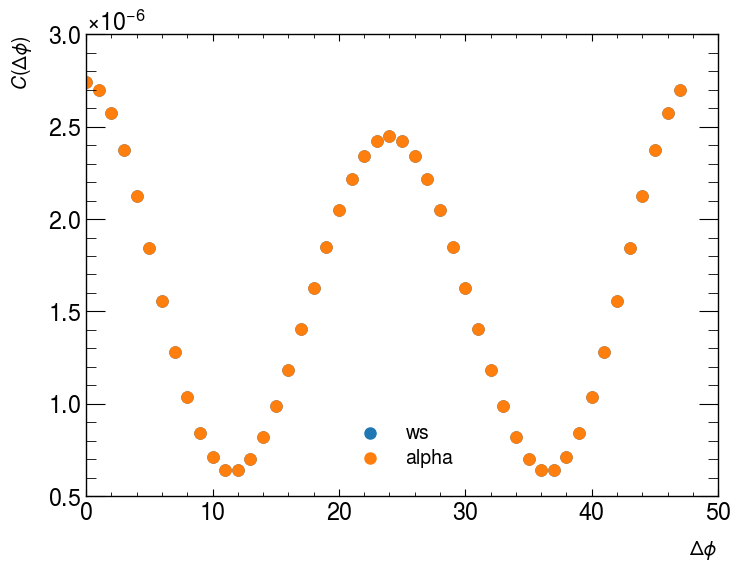

In [42]:
x = np.linspace(0,len(m_Sphi_ws)-1,len(m_Sphi_ws))
plt.scatter(x,c_delta_phi_ws,label="ws")
plt.scatter(x,c_delta_phi_alpha,label="alpha")
plt.legend()
plt.xlabel(r"$\Delta \phi$")
plt.ylabel(r"$C(\Delta \phi)$")

In [43]:
# xx = np.linspace(-np.pi,np.pi,len(c_delta_phi_ws))
# ff_alpha = interp1d(xx,c_delta_phi_alpha)
# ff_ws = interp1d(xx,c_delta_phi_ws)
# plt.plot(xx,ff_ws(xx))
# plt.plot(xx,ff_alpha(xx))
# ws_a = quad(ff_ws,-np.pi,np.pi)[0]
# alpha_a = quad(ff_alpha,-np.pi,np.pi)[0]

In [44]:
def cal_norm_C(c_delta_phi_ws):
    '''计算归一化常数
    '''
    xx = np.linspace(-np.pi,np.pi,len(c_delta_phi_ws))
    ff_ws = interp1d(xx,c_delta_phi_ws)
    ws_a = quad(ff_ws,-np.pi,np.pi)[0] 
    return ws_a

In [45]:
ws_a = cal_norm_C(c_delta_phi_ws)
alpha_a = cal_norm_C(c_delta_phi_alpha)

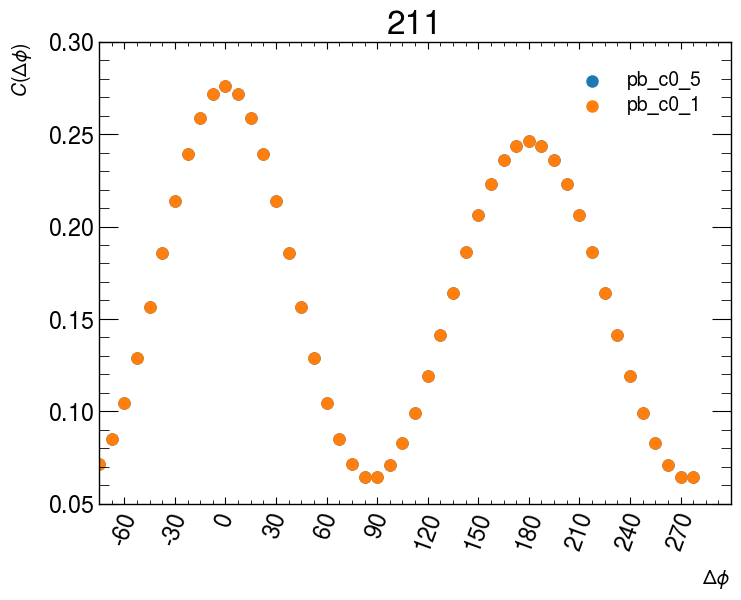

Text(0, 1, '$C_{alpha}(\\Delta \\phi)/C_{ws}(\\Delta \\phi)$')

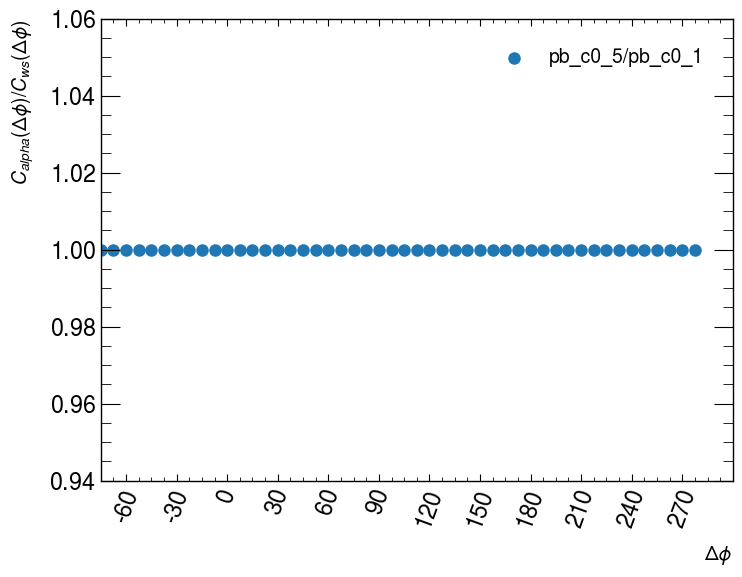

In [46]:
nn = 38
x = np.linspace(0,len(m_Sphi_ws)-1,len(m_Sphi_ws))
xx = np.concatenate((x[nn:],x[:nn]))[::4]
xxx = np.array((xx-48+nn)*360/48,dtype="int")
x_ws = np.linspace(0,len(m_Sphi_ws)-1,len(m_Sphi_ws),dtype="int")
yy_ws = np.concatenate((c_delta_phi_ws[nn:],c_delta_phi_ws[:nn]))

x_alpha = np.linspace(0,len(m_Sphi_alpha)-1,len(m_Sphi_alpha),dtype="int")
yy_alpha = np.concatenate((c_delta_phi_alpha[nn:],c_delta_phi_alpha[:nn]))


plt.scatter(x_ws,yy_ws/ws_a,label="pb_c0_5")
# plt.errorbar(x_ws,yy_ws/ws_a,yy_ws/ws_a/np.sqrt(len(o16_ws_mideta)))
plt.scatter(x_alpha,yy_alpha/alpha_a,label="pb_c0_1")
# plt.errorbar(x_alpha,yy_alpha/alpha_a,yy_alpha/alpha_a/np.sqrt(len(o16_alpha_mideta)))
plt.legend()
plt.xticks(xx,labels=xxx,rotation=70)
plt.title("211")
plt.xlabel(r"$\Delta \phi$")
plt.ylabel(r"$C(\Delta \phi)$")
plt.show()

# plt.scatter(x_ws,yy_ws,label="ws")
plt.scatter(x_alpha,(yy_ws/ws_a)/(yy_alpha/alpha_a),label="pb_c0_5/pb_c0_1")
plt.legend()
plt.xticks(xx,labels=xxx,rotation=70)
plt.xlabel(r"$\Delta \phi$")
plt.ylabel(r"$C_{alpha}(\Delta \phi)/C_{ws}(\Delta \phi)$")

## 不同pt的区间dN/dphi

In [47]:
ws_dNdphi_pt = o16_ws_mideta[:,0,:]
alpha_dNdphi_pt = o16_alpha_mideta[:,0,:]

In [48]:
ws_cdf = cal_cdf_2(ws_dNdphi_pt)
alpha_cdf = cal_cdf_2(alpha_dNdphi_pt)

ws_dNdphi_pt = new_dNdphi_2(ws_cdf)
alpha_dNdphi_pt = new_dNdphi_2(alpha_cdf)

In [49]:
m_Sptphi_ws = np.mean(o16_ws_mideta,axis=0)
m_Sptphi_alpha = np.mean(o16_alpha_mideta,axis=0)
m_Sptphi_ws.shape

(15, 48)

In [50]:
def delta_ptphi(o16_ws_mideta,m_Sptphi_ws):
    c_delta_ptphi_ws = []
    for i in range(len(m_Sptphi_ws)):
        aa = []
        for j in range(len(m_Sptphi_ws[0])):
            aa.append(C_deltaphi(o16_ws_mideta[:,i,:],m_Sptphi_ws[i,:],j))
        c_delta_ptphi_ws.append(aa)
    return np.array(c_delta_ptphi_ws)

In [51]:
# c_delta_ptphi_ws = []
# for i in range(len(m_Sptphi_ws)):
#     aa = []
#     for j in range(len(m_Sptphi_ws[0])):
#         aa.append(C_deltaphi(o16_ws_mideta[:,i,:],m_Sptphi_ws[i,:],j))
#     c_delta_ptphi_ws.append(aa)
    
# # c_delta_phi_alpha = []
# # for i in range(len(m_Sphi_alpha)):
# #     c_delta_phi_alpha.append(C_deltaphi(alpha_dNdphi,m_Sphi_alpha,i))

In [52]:
def aver_phi(o16_ws_mideta):
    '''对(2000,15,48)中的每个pt做均匀化的phi
    '''
    aaa = []
    for i in tqdm(range(len(o16_ws_mideta[0]))):
        ws_dNdphi_pt = o16_ws_mideta[:,i,:]
        ws_cdf = cal_cdf_2(ws_dNdphi_pt)
        ws_dNdphi_pt = new_dNdphi_2(ws_cdf)
        aaa.append(ws_dNdphi_pt)
    return np.array(aaa)

In [53]:
o16_ws_mideta_1 = aver_phi(o16_ws_mideta)
o16_alpha_mideta_1 = aver_phi(o16_alpha_mideta)

100%|███████████████████████████████████████████| 15/15 [00:14<00:00,  1.03it/s]


In [54]:
def cal_dNdptdphi(o16_ws_mideta,pt):
    '''计算所有事件的dNdptdphi
    '''
    ws_dNdphi = []
    for i in tqdm(range(len(o16_ws_mideta[0]))):
        aaa = []
        for j in range(len(o16_ws_mideta)):
            aaa.append(o16_ws_mideta[j][i]*pt[j])     #乘以pt
#             aaa.append(o16_ws_mideta[j][i])      #不乘以pt
        ws_dNdphi.append(aaa)
    return np.array(ws_dNdphi)

In [55]:
ws_dNdptdphi = cal_dNdptdphi(o16_ws_mideta_1,pt)
alpha_dNdptdphi = cal_dNdptdphi(o16_alpha_mideta_1,pt)

100%|███████████████████████████████████| 2000/2000 [00:00<00:00, 112675.90it/s]


In [56]:
c_delta_ptphi_ws = delta_ptphi(ws_dNdptdphi,m_Sptphi_ws)
c_delta_ptphi_alpha = delta_ptphi(alpha_dNdptdphi,m_Sptphi_alpha)
c_delta_ptphi_ws.shape

(15, 48)

In [57]:
# def plot_delta_phi(c_delta_ptphi_ws,c_delta_ptphi_alpha,m_Sptphi_ws):
#     x = np.linspace(0,len(m_Sptphi_ws)-1,len(m_Sptphi_ws))
#     plt.scatter(x,c_delta_ptphi_ws,label="ws")
#     plt.scatter(x,c_delta_ptphi_alpha,label="alpha")
#     plt.legend()
#     plt.xlabel(r"$\Delta \phi$")
#     plt.ylabel(r"$C(\Delta \phi)$")
#     plt.show()

In [58]:
# def plot_delta_phi_2(c_delta_ptphi_ws,c_delta_ptphi_alpha,m_Sptphi_ws):
#     x = np.linspace(0,len(m_Sptphi_ws)-1,len(m_Sptphi_ws))
#     plt.scatter(x,c_delta_ptphi_ws,label="ws")
#     plt.legend()
#     plt.show()
#     plt.scatter(x,c_delta_ptphi_alpha,label="alpha")
#     plt.legend()
#     plt.xlabel(r"$\Delta \phi$")
#     plt.ylabel(r"$C(\Delta \phi)$")
#     plt.show()

In [59]:
# def plot_delta_phi_1(c_delta_ptphi_ws,c_delta_ptphi_alpha,m_Sptphi_ws):
#     x = np.linspace(0,len(m_Sptphi_ws)-1,len(m_Sptphi_ws))
#     plt.scatter(x,c_delta_ptphi_alpha/c_delta_ptphi_ws,label="alpha/ws")
#     plt.legend()
#     plt.xlabel(r"$\Delta \phi$")
#     plt.ylabel(r"$C(\Delta \phi)$")
#     plt.show()

In [60]:
def plot_delta_phi(c_delta_ptphi_ws,c_delta_ptphi_alpha,m_Sptphi_ws):
    nn = 38
    xx = np.concatenate((x[nn:],x[:nn]))[::4]
    xxx = np.array((xx-48+nn)*360/48,dtype="int")
    x_ws = np.linspace(0,len(m_Sptphi_ws)-1,len(m_Sptphi_ws),dtype="int")
    yy_ws = np.concatenate((c_delta_ptphi_ws[nn:],c_delta_ptphi_ws[:nn]))

    yy_alpha = np.concatenate((c_delta_ptphi_alpha[nn:],c_delta_ptphi_alpha[:nn]))

    #归一化常数
    ws_a = cal_norm_C(c_delta_ptphi_ws)
    alpha_a = cal_norm_C(c_delta_ptphi_alpha)
    
    plt.scatter(x_ws,yy_ws/ws_a,label="ws")
    plt.scatter(x_ws,yy_alpha/alpha_a,label="alpha")
    plt.legend()
    plt.xticks(xx,labels=xxx,rotation=70)
    plt.xlabel(r"$\Delta \phi$")
    plt.ylabel(r"$C(\Delta \phi)$")
    plt.show()

In [61]:
def plot_delta_phi_1(c_delta_ptphi_ws,c_delta_ptphi_alpha,m_Sptphi_ws):
    nn = 38
    xx = np.concatenate((x[nn:],x[:nn]))[::4]
    xxx = np.array((xx-48+nn)*360/48,dtype="int")
    x_ws = np.linspace(0,len(m_Sptphi_ws)-1,len(m_Sptphi_ws),dtype="int")
    yy_ws = np.concatenate((c_delta_ptphi_ws[nn:],c_delta_ptphi_ws[:nn]))

    yy_alpha = np.concatenate((c_delta_ptphi_alpha[nn:],c_delta_ptphi_alpha[:nn]))


    #归一化常数
    ws_a = cal_norm_C(c_delta_ptphi_ws)
    alpha_a = cal_norm_C(c_delta_ptphi_alpha)
    
    plt.scatter(x_ws,(yy_alpha/alpha_a)/(yy_ws/ws_a),label="alpha/ws")
    plt.legend()
    plt.xticks(xx,labels=xxx,rotation=70)
    plt.xlabel(r"$\Delta \phi$")
    plt.ylabel(r"$C_{alpha}(\Delta \phi)/C_{ws}(\Delta \phi)$")
    plt.show()

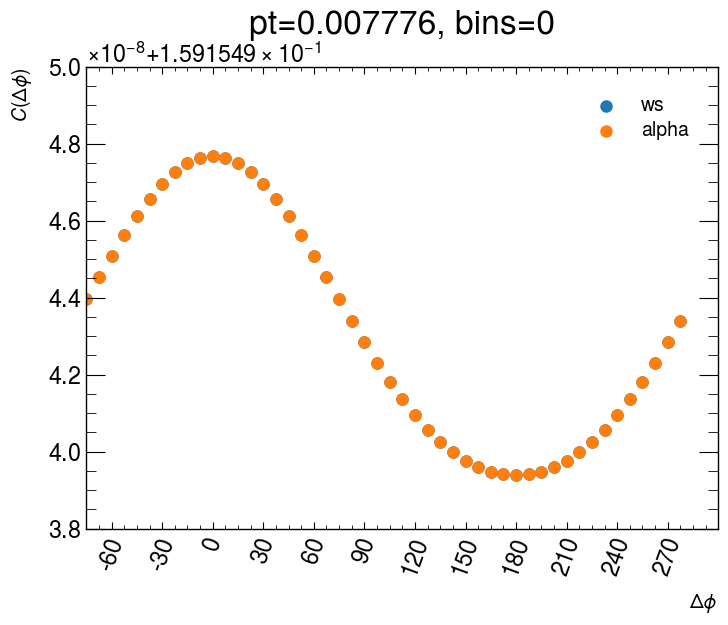

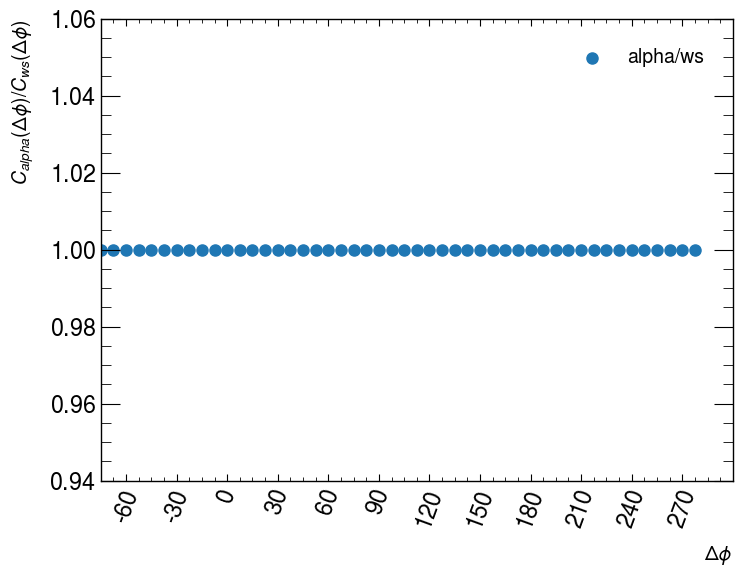

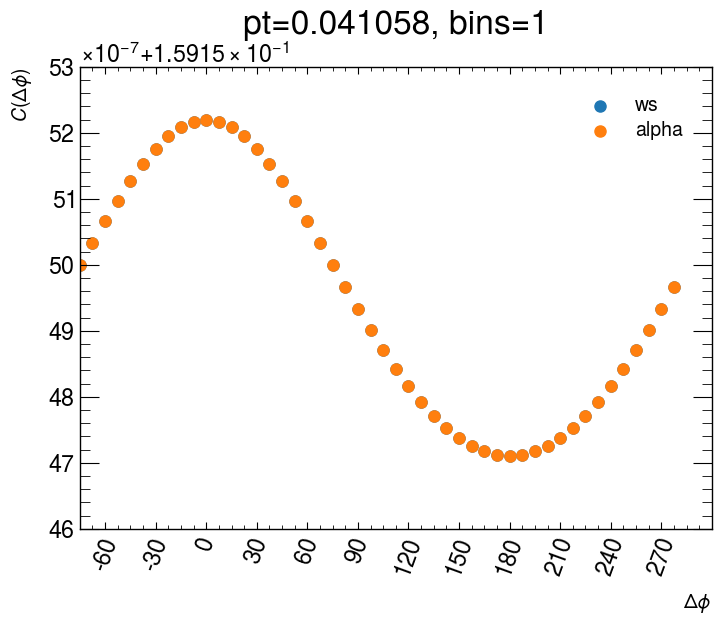

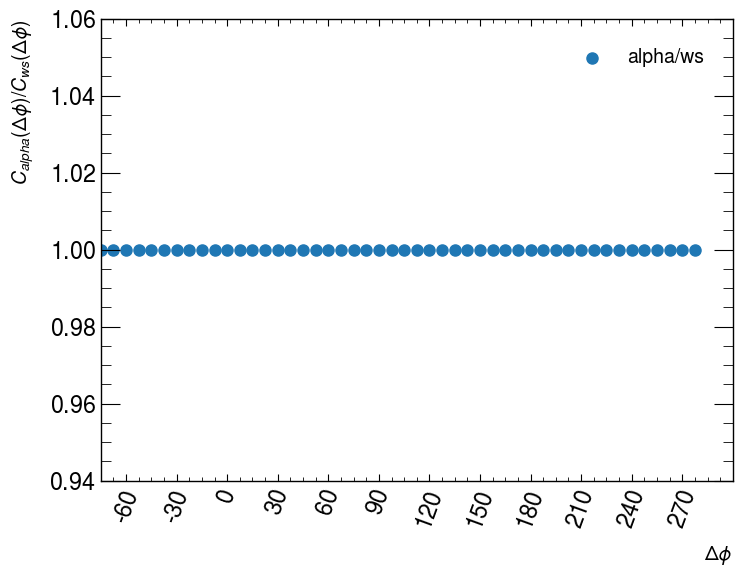

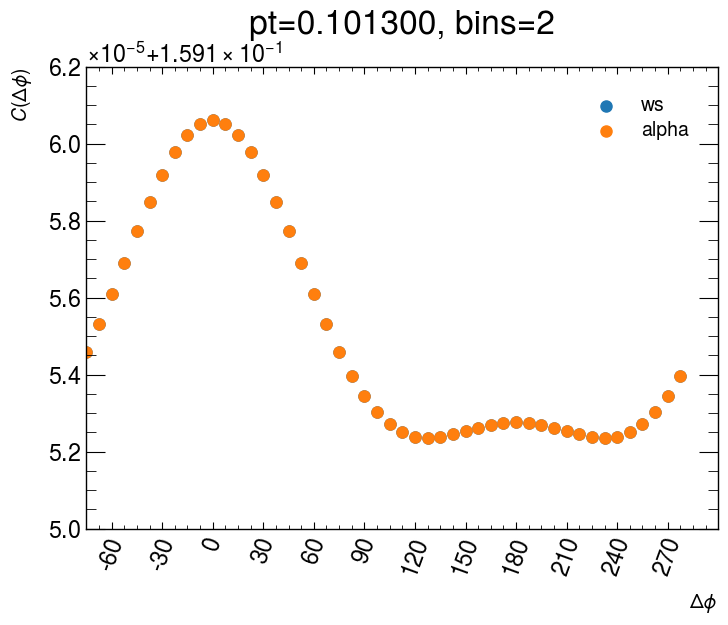

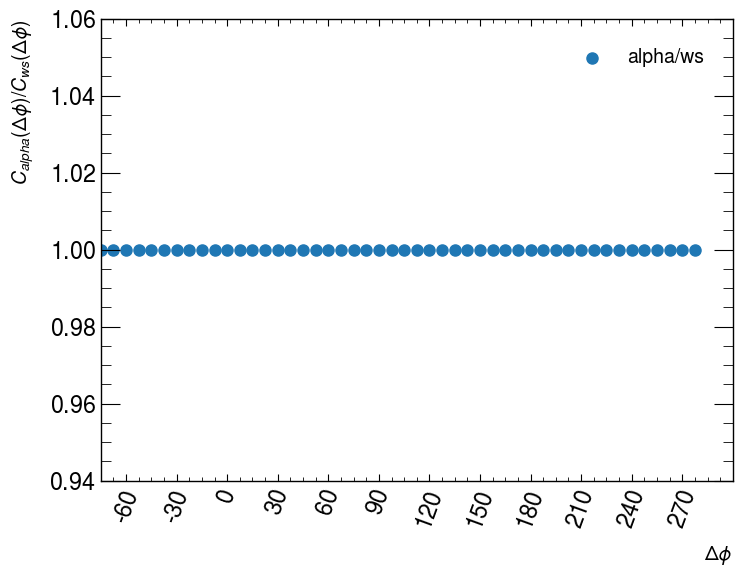

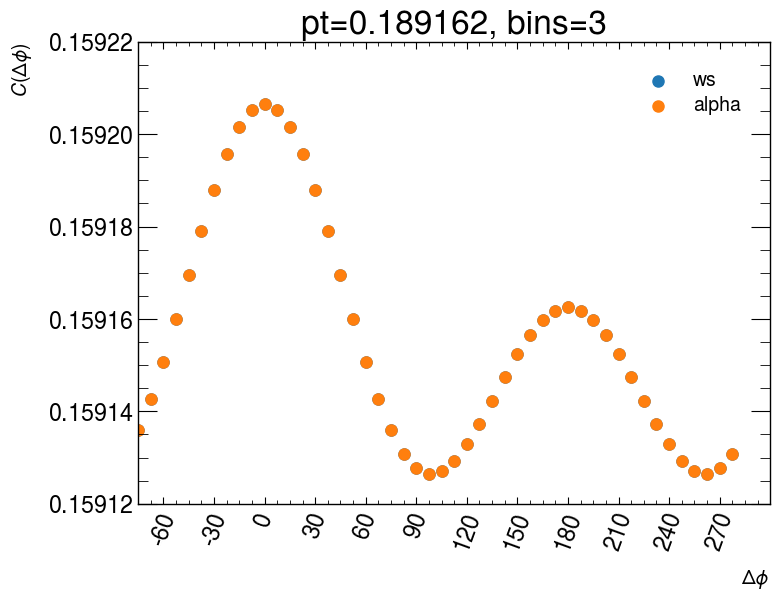

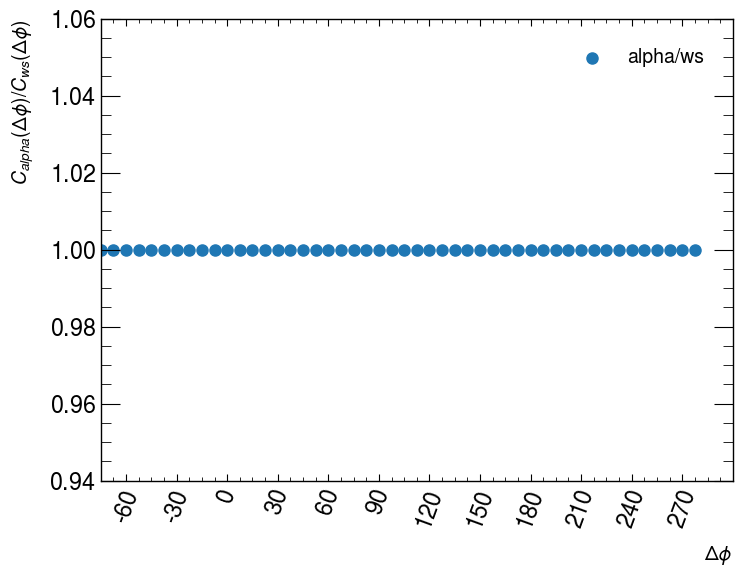

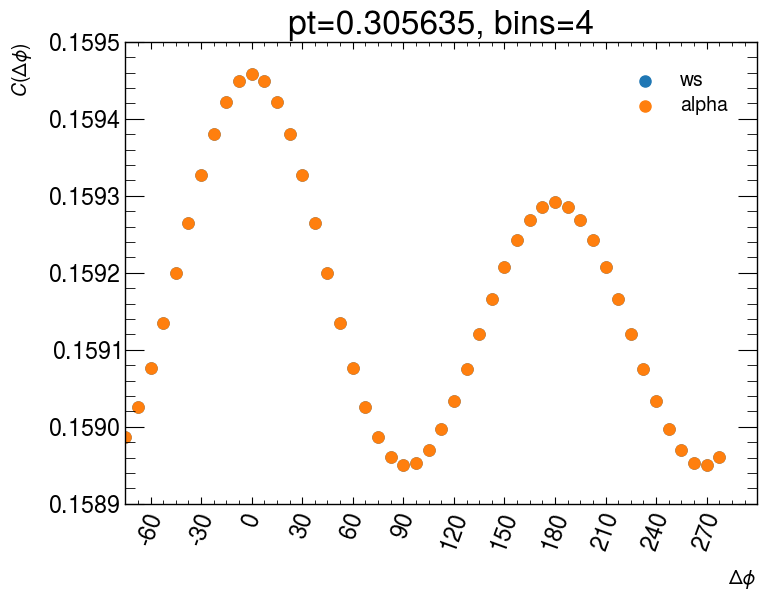

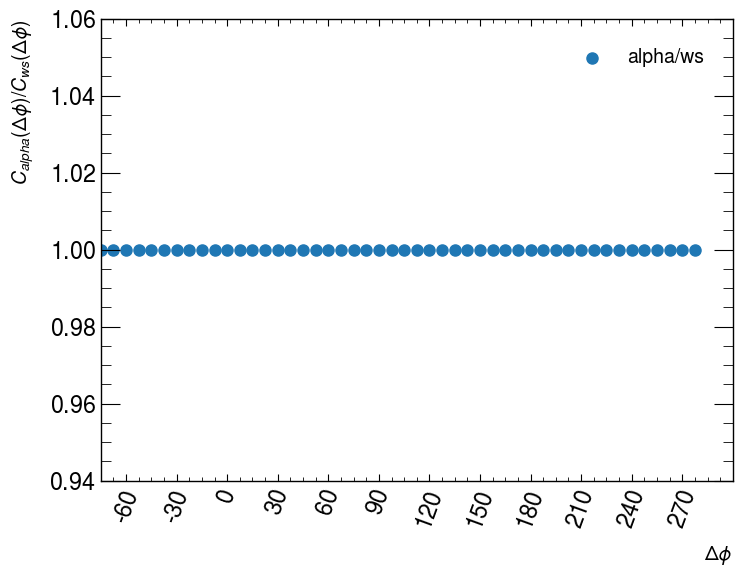

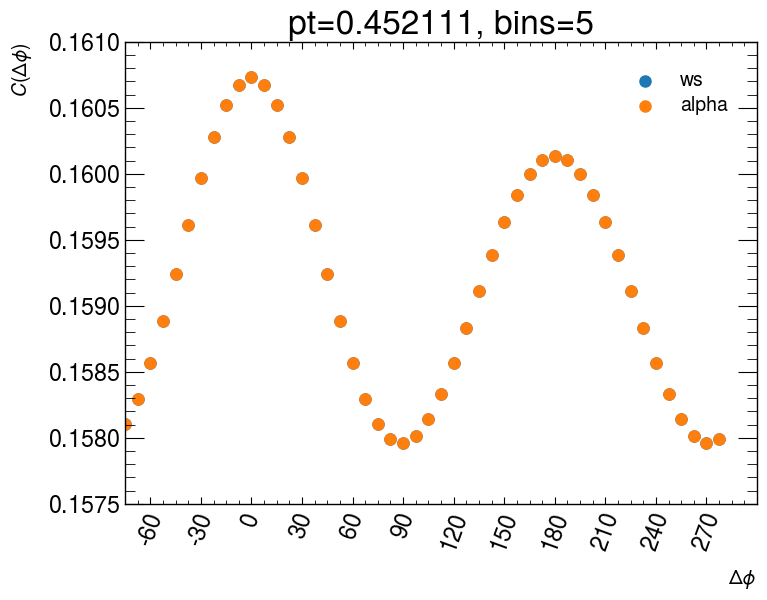

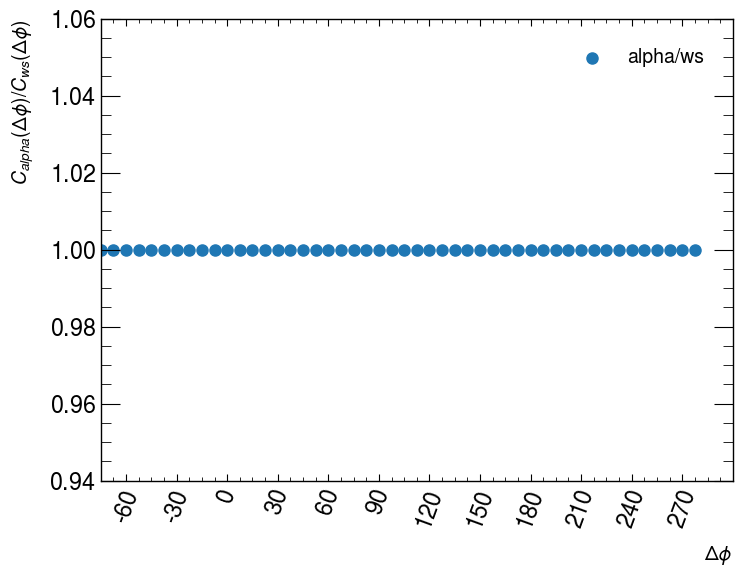

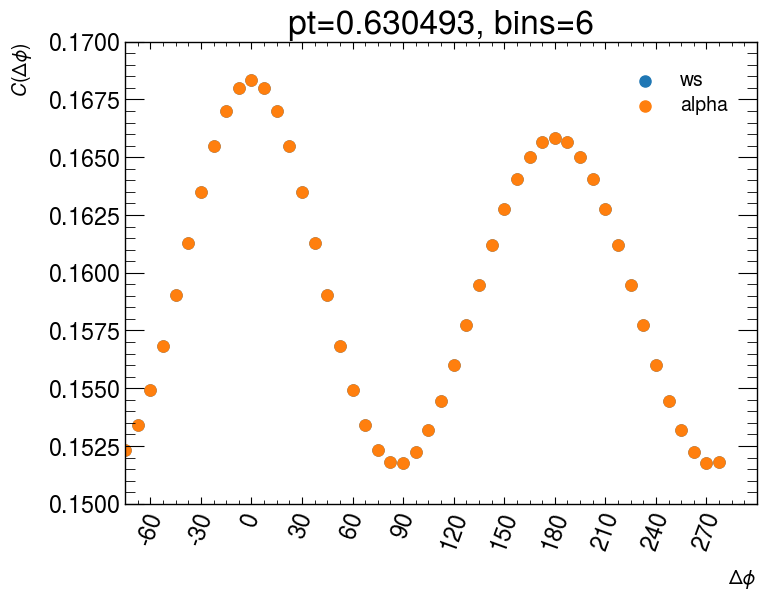

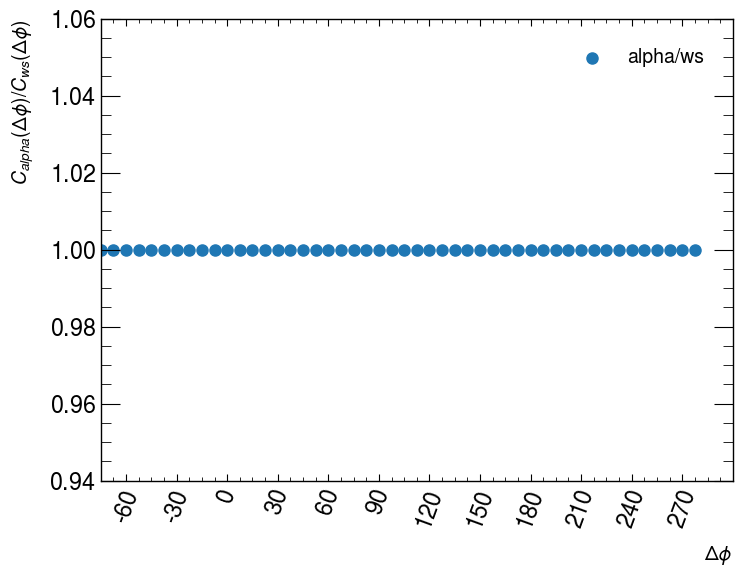

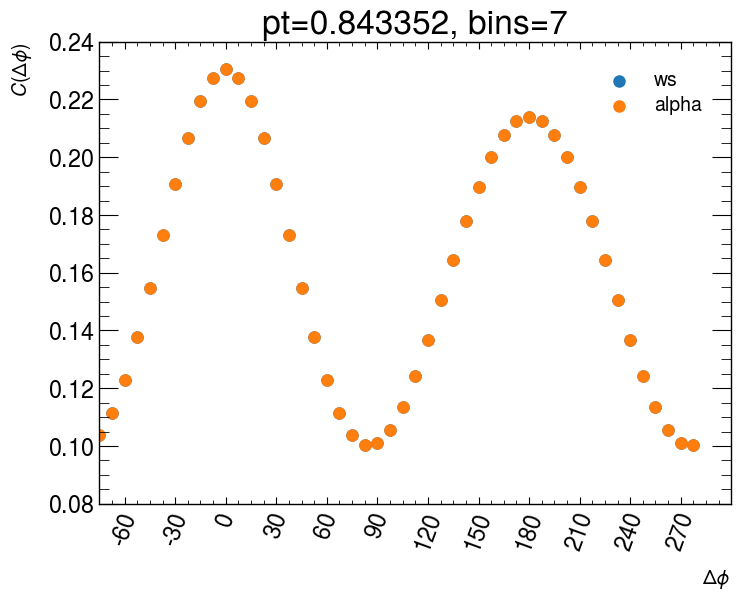

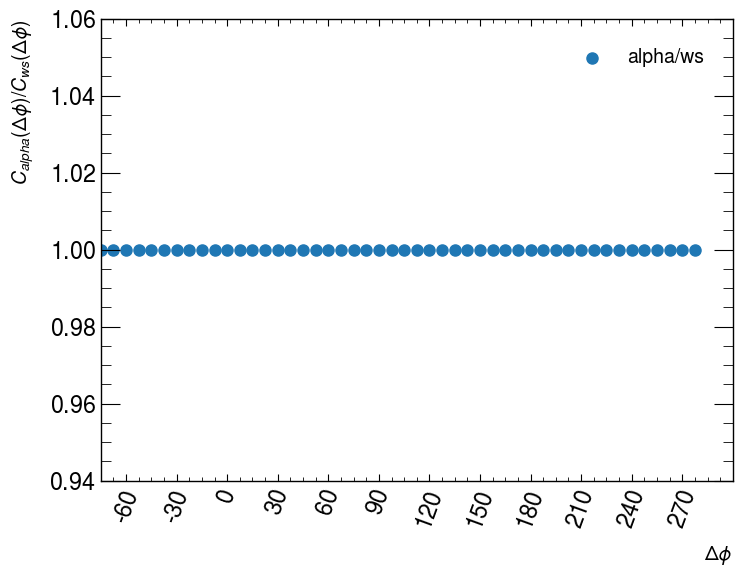

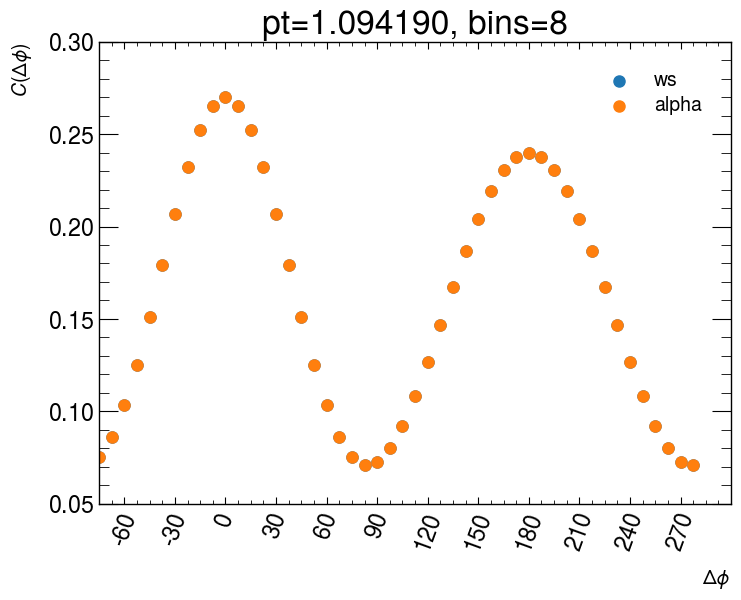

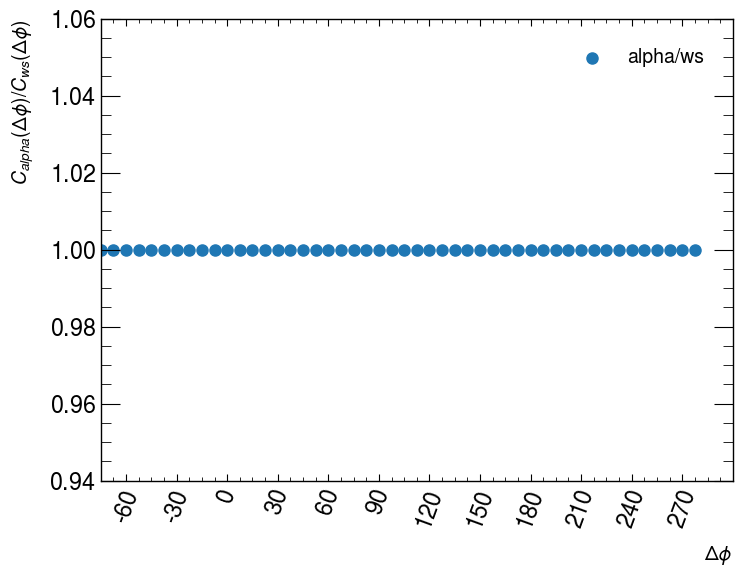

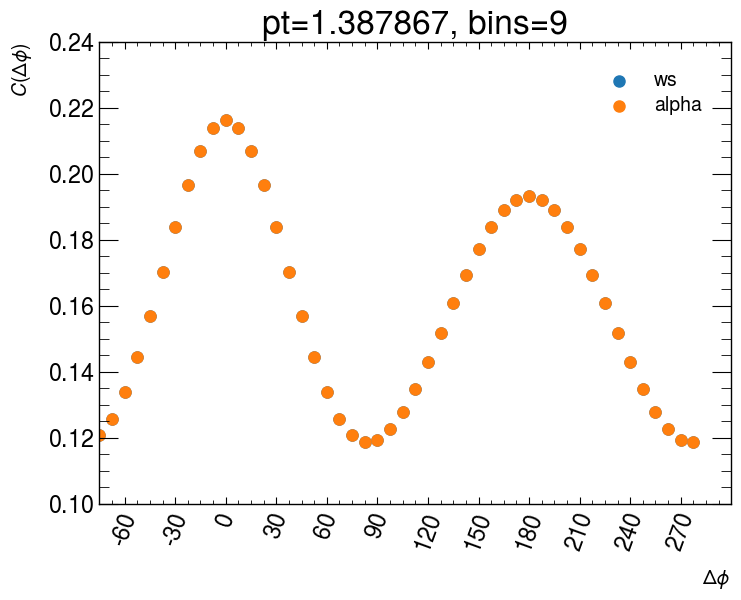

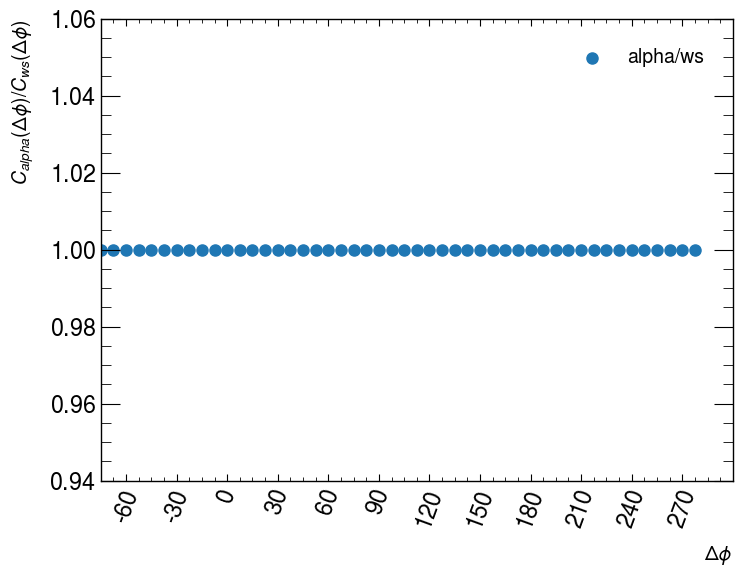

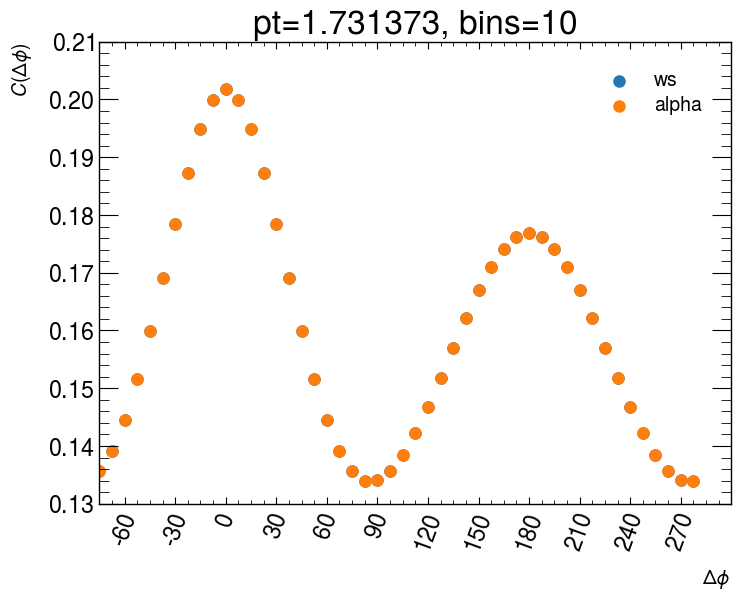

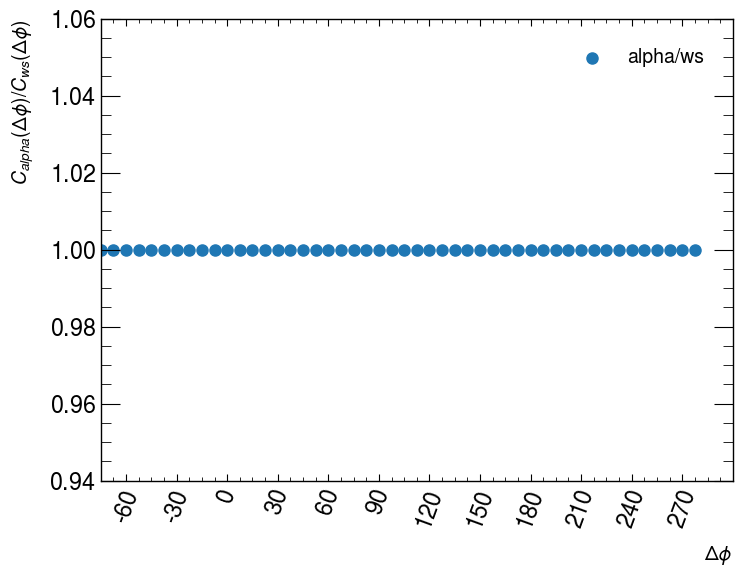

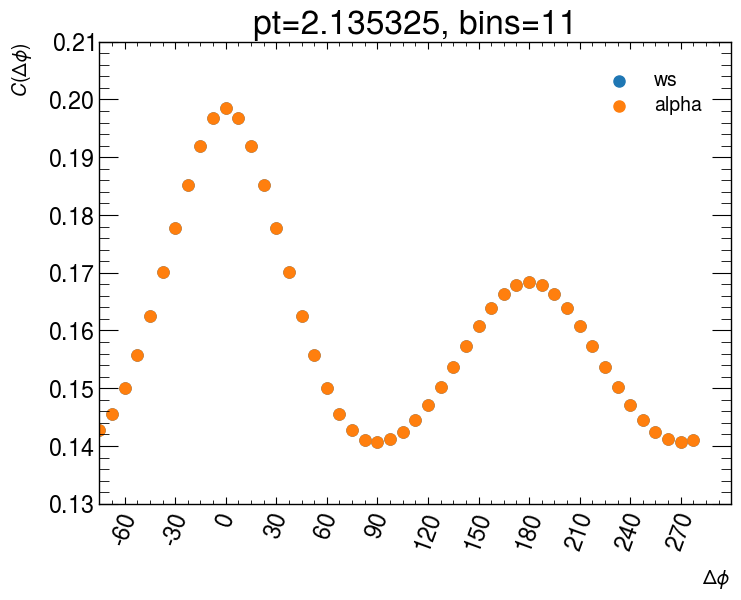

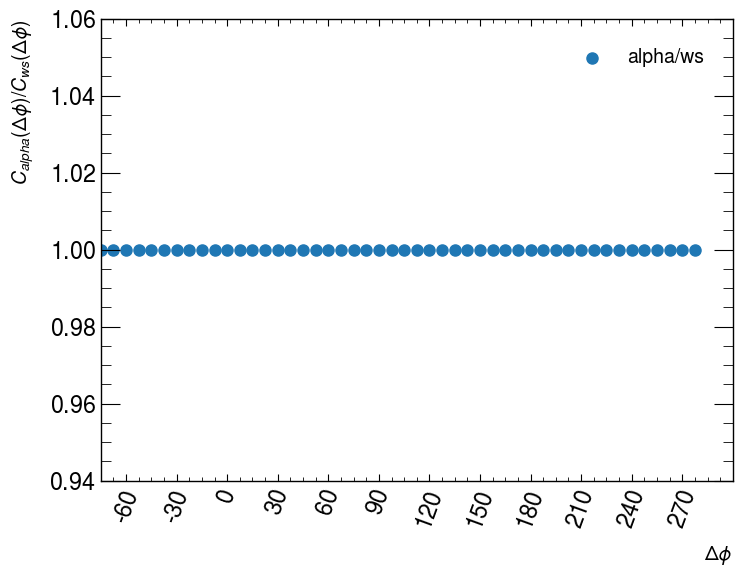

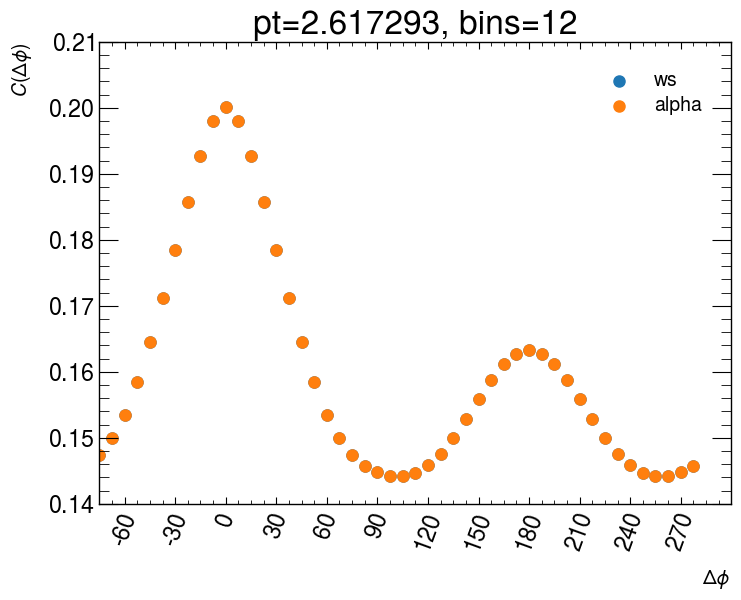

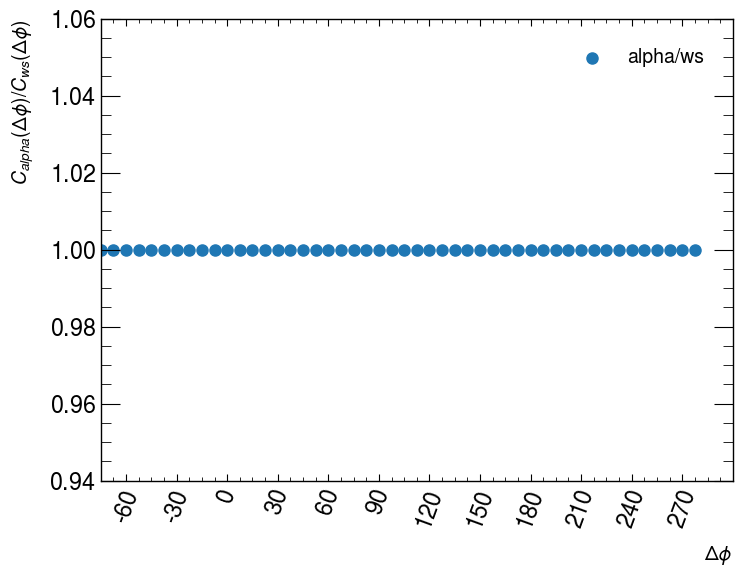

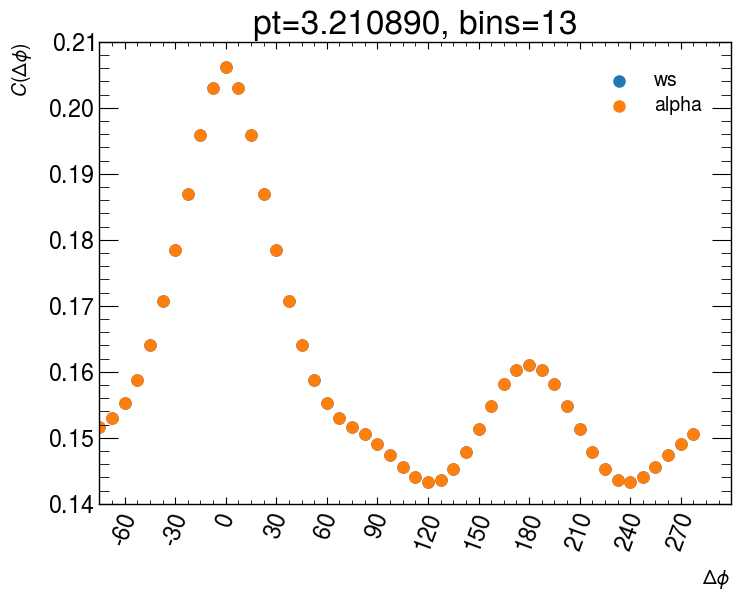

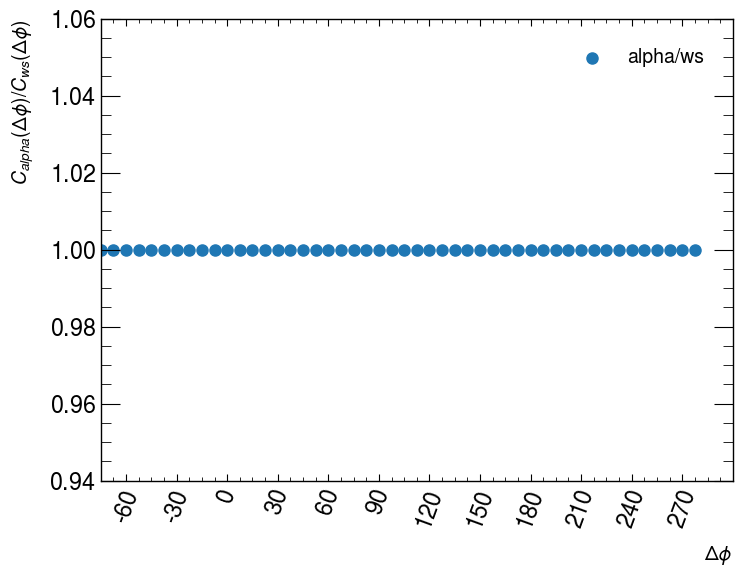

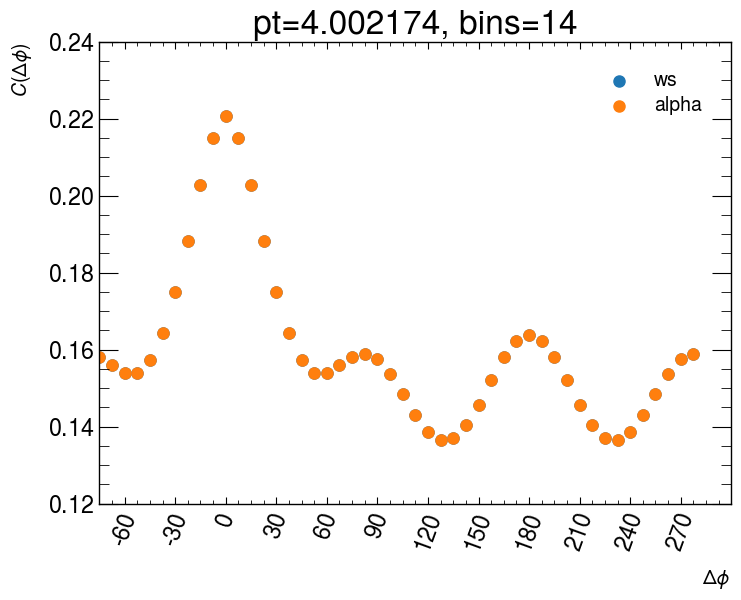

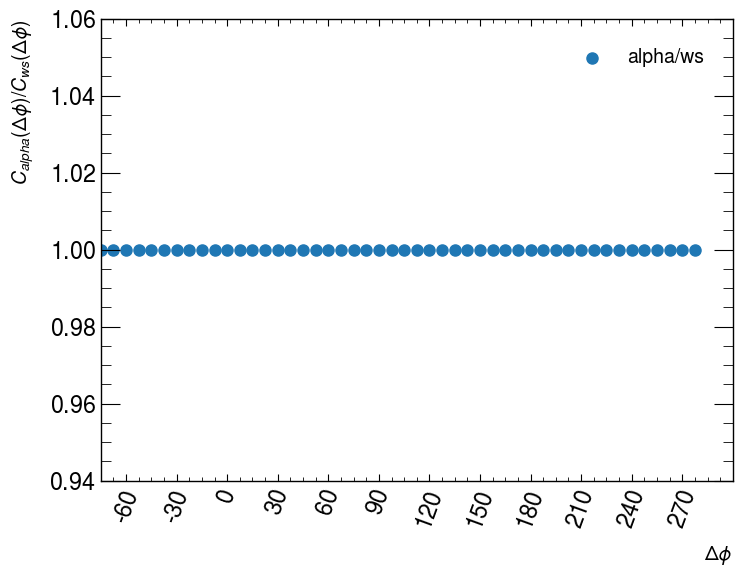

In [62]:
for i in range(15):
    plt.title(r"pt=%f, bins=%d"%(pt[i],i))
    plot_delta_phi(c_delta_ptphi_ws[i,:],c_delta_ptphi_alpha[i,:],m_Sptphi_ws[i,:])
    plot_delta_phi_1(c_delta_ptphi_ws[i,:],c_delta_ptphi_alpha[i,:],m_Sptphi_ws[i,:])

In [63]:
def plot_3d(m_Sptphi_ws,m_Sptphi_alpha,y,c_delta_ptphi_ws,c_delta_ptphi_alpha):
    for i in range(15):
        x = np.linspace(0,len(m_Sptphi_ws[i,:])-1,len(m_Sptphi_ws[i,:]))
        ax.scatter(x,y[i],c_delta_ptphi_ws[i,:]/c_delta_ptphi_alpha[i,:])

In [64]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。

y = np.linspace(0,14,15)
# plot_3d(m_Sptphi_ws,y,c_delta_ptphi_ws,c_delta_ptphi_alpha)
# plot_3d(m_Sptphi_alpha,y,c_delta_ptphi_alpha)
for i in range(15):
    x = np.linspace(0,len(m_Sptphi_ws[i,:])-1,len(m_Sptphi_ws[i,:]))
    ax.scatter(x,y[i],c_delta_ptphi_alpha[i,:]/c_delta_ptphi_ws[i,:])

ax.set_xlabel(r"$\Delta \phi$") # 画出坐标轴
ax.set_ylabel('pt_bins')
ax.set_zlabel(r"$C_{alpha}(\Delta \phi)/C_{ws}(\Delta \phi)$")

plt.show()

<Figure size 800x600 with 0 Axes>

In [ ]:
3.18, correct_a(0.662

In [106]:
def pdf_O(r):
    rho0=0.17
    R0=2.608
    w = -0.051
    
    a0=0.513
#     beta2=0.0
#     beta3=0.0

#     coef20 = np.sqrt(5/(16*np.pi))
#     coef30 = np.sqrt(7/(16*np.pi))
    
# #     Y_20 = (3 * np.cos(theta)**2 - 1)
# #     Y_30 = (5 * np.cos(theta)**3 - 3 * np.cos(theta))
    
    R = R0
    
    rho = rho0/(1 + np.exp((r - R)/a0))*(1+w*(r/R0)**2)
              
    return  r**2 * rho

In [107]:
r = np.linspace(0,10,100)
pr = pdf_O(r)

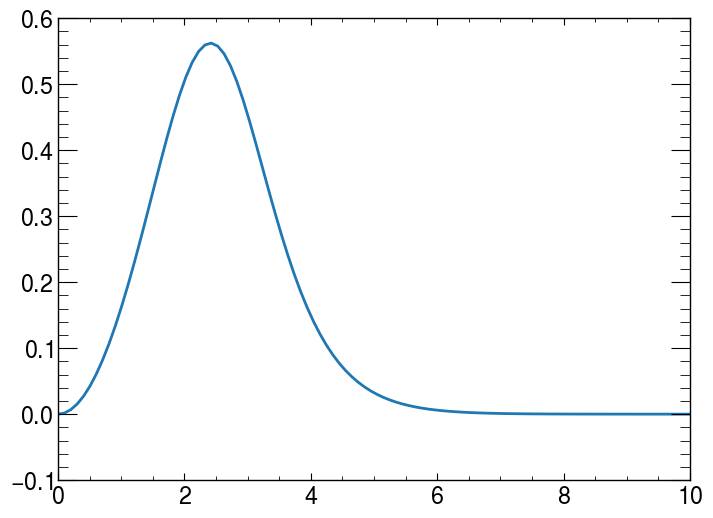

In [108]:
plt.plot(r, pr)

In [109]:
def rejection_sampling(pdf, n=1000, ymax=1, xmin=0, xmax_theta=np.pi,xmax_phi=2*np.pi,xmax_r=10):
    samples_r = np.zeros(n, dtype=np.float32)
#     samples_theta = np.zeros(n, dtype=np.float32)
#     samples_phi = np.zeros(n, dtype=np.float32)
    i = 0
    while i < n:
        r = xmin + (xmax_r - xmin) * np.random.rand()
#         theta = xmin + (xmax_theta - xmin) * np.random.rand()
#         phi = xmin + (xmax_phi - xmin) * np.random.rand()
        y = ymax * np.random.rand()
        if y < pdf(r):   # accept
            samples_r[i] = r
#             samples_theta[i] = theta
#             samples_phi[i] = phi
            i = i + 1
    
    return samples_r

In [113]:
OO_creacte_ws_r = rejection_sampling(pdf_O, n=1000, ymax=1, xmin=0, xmax_theta=np.pi,xmax_phi=2*np.pi,xmax_r=10)

In [112]:
def pdf_theta(theta):
    return np.sin(theta)/2

In [114]:
OO_creacte_ws_theta = rejection_sampling(pdf_theta, n=1000, ymax=1, xmin=0, xmax_theta=np.pi,xmax_phi=2*np.pi,xmax_r=10)

In [115]:
phi = np.random.uniform(0,2*np.pi,1000)

In [130]:
data_d  =  np.concatenate((OO_creacte_ws_r.T,OO_creacte_ws_theta.T,phi.T),axis=0)

In [131]:
data_d.shape

(3000,)

In [ ]:
#把直角坐标改为球坐标
def trento_data(n=100000):
#     r_trento = np.zeros(100000, dtype=np.float32)
    
#     cos_theta = np.zeros(100000, dtype=np.float32)
#     sin_theta = np.zeros(100000, dtype=np.float32)

#     tan_theta = np.zeros(100000, dtype=np.float32)
#     tan_phi = np.zeros(100000, dtype=np.float32)
#     phi_trento = np.zeros(100000, dtype=np.float32)
    x = np.zeros(n, dtype=np.float32)
    y = np.zeros(n, dtype=np.float32)
    z = np.zeros(n, dtype=np.float32)
    


    i = 0
    j = 0
    for j in range(n):

        x[j] = data_d[i][0]-data_d[i+1][0]
        y[j] = data_d[i][1]-data_d[i+1][1]
        z[j] = data_d[i][2]-data_d[i+1][2]
        i = i +2
        j = j +1
        
    r_trento = np.sqrt(x**2 + y**2 + z**2)

    cos_theta = z/r_trento
    sin_theta = np.sqrt(1 - cos_theta**2)
    tan_theta = sin_theta/cos_theta
    
    tan_phi = y/x
    
    phi_trento = np.arctan2(y,x)
    theta_trento = np.arctan2(sin_theta,cos_theta)
    
    return r_trento, theta_trento,phi_trento